# Задания

1. Скачать датасет [Nails segmentation](https://www.kaggle.com/vpapenko/nails-segmentation#1eecab90-1a92-43a7-b952-0204384e1fae.jpg). Составить список из пар (<имя изображения>, <маска>) для всех данных, используя функцию os.listdir() или glob.glob().  
2. Создать генератор, который на каждой итерации возвращает пару списков из заданного количества (аргумент функции) изображений и масок к ним (итератор должен перемешивать примеры).  
3. Добавить в генератор случайную аугментацию (каждая применяется случайно). После преобразований все изображения должны иметь одинаковый размер. *Обратите внимание, что большинство преобразований должны применяться одинаково к изображению и маске*
    1. Поворот на случайный угол
    2. Отражение по вертикали, горизонтали
    3. Вырезание части изображения
    4. Размытие  
   

In [1]:
# Скачать датасет Nails segmentation. Составить список из пар (<имя изображения>, <маска>) для всех данных, 
# используя функцию os.listdir() или glob.glob(). 

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

path_to_images = 'nails_segmentation\images'

names = os.listdir(path_to_images)

list_of_pairs = []

for n in names:
    path_to_labels = 'nails_segmentation\labels\\' + n
    list_of_pairs.append([path_to_images + '\\' + n, path_to_labels])

In [2]:
# 2. Создать генератор, который на каждой итерации возвращает пару списков из заданного количества 
# (аргумент функции) изображений и масок к ним (итератор должен перемешивать примеры).  
import random

def generator(data, size):
    images = []
    labels = []
    d = data.copy()
    random.shuffle(d)
    count = 0
    for x, y in d:
        path_to_img, path_to_lb = x, y
            
        img = cv2.imread(path_to_img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img)
            
        lb = cv2.imread(path_to_lb, cv2.IMREAD_GRAYSCALE)
        labels.append(lb)
        count = count + 1
        if count % size == 0:
            yield images, labels
            images = []
            labels = []
        

3   3
3   3
3   3
3   3
3   3
3   3
3   3
3   3
3   3
3   3
3   3
3   3
3   3
3   3
3   3
3   3
3   3


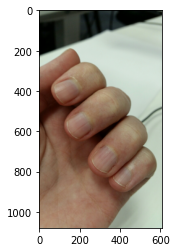

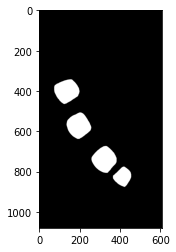

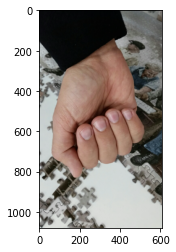

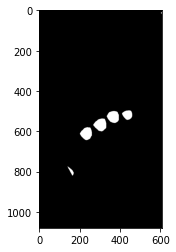

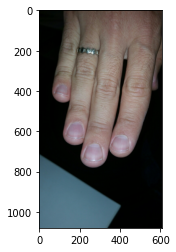

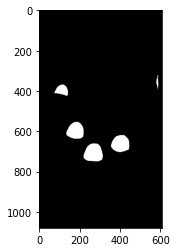

In [3]:
for img, img_lab in generator(list_of_pairs, 3):
    print(len(img), ' ', len(img_lab))   # для проверки
for x, y in zip(img, img_lab):
    plt.imshow(x)
    plt.show()
    plt.imshow(y, cmap='gray')
    plt.show()

In [5]:
import random

def aug(img, label):
    (h, w, d) = img.shape
    
#    Поворот на случайный угол
    if random.random() > 0.5:
        center = (w // 2, h // 2)
        angle = random.randint(-180,180)
        M = cv2.getRotationMatrix2D(center, angle, 1)  # Указывается центр, угол поворота, масштаб
        img = cv2.warpAffine(img, M, (h,w))
        label = cv2.warpAffine(label, M, (h,w))
        
#    Отражение по вертикали, горизонтали
    if random.random() > 0.5:
        if random.random() > 0.5:
            img = cv2.flip(img, 1) # horizontal flip
            label = cv2.flip(label, 1)
        else:
            img = cv2.flip(img, 0) # vertical flip
            label = cv2.flip(label, 0)
    
#    Вырезание части изображения
    if random.random() > 0.75:
        x0 = random.randint(0, w // 2)
        y0 = random.randint(0, h // 2)
        x1 = random.randint(w // 3, w // 2)
        y1 = random.randint(h // 3, h // 2)
    
        img = img[x0:(x0+x1), y0:(y0+y1)]
        label = label[x0:(x0+x1), y0:(y0+y1)]
    
#    Размытие.
    if random.random() > 0.5:
        kernel = (random.randint(1,16), random.randint(1,16))
        img = cv2.blur(img, kernel)
        label = cv2.blur(label, kernel)
    
# После преобразований все изображения должны иметь одинаковый размер.
    img = cv2.resize(img, (256, 256))
    label = cv2.resize(label, (256, 256))
    
    return img, label

In [6]:
# 3. Добавить в генератор случайную аугментацию (каждая применяется случайно). 
# После преобразований все изображения должны иметь одинаковый размер. 
# Обратите внимание, что большинство преобразований должны применяться одинаково к изображению и маске
#    Поворот на случайный угол
#    Отражение по вертикали, горизонтали
#    Вырезание части изображения
#    Размытие.

import random

def generator_with_aug(data, size):
    images = []
    labels = []
    d = data.copy()
    random.shuffle(d)
    count = 0
    for x, y in d:
        path_to_img, path_to_lb = x, y
        
        img = cv2.imread(path_to_img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        lb = cv2.imread(path_to_lb, cv2.IMREAD_GRAYSCALE)
        
        img, lb = aug(img, lb)
        
        images.append(img)
        labels.append(lb)
        count = count + 1
        if count % size == 0:
            yield images, labels
            images = []
            labels = []

4   4
4   4
4   4
4   4
4   4
4   4
4   4
4   4
4   4
4   4
4   4
4   4
4   4


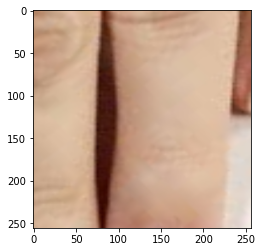

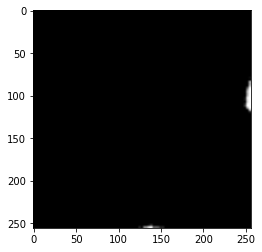

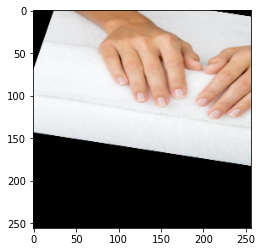

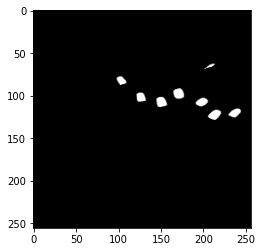

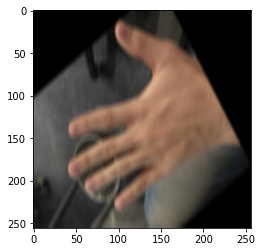

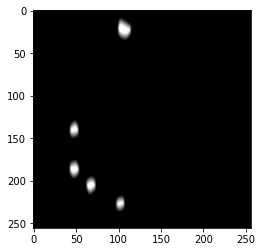

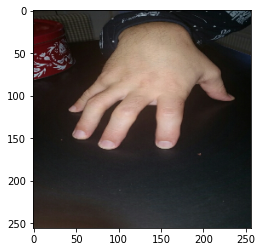

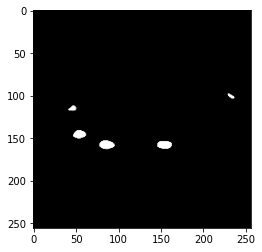

In [7]:
for img, img_lab in generator_with_aug(list_of_pairs, 4):
    print(len(img), ' ', len(img_lab))    
    
for x, y in zip(img, img_lab):
    plt.imshow(x)
    plt.show()
    plt.imshow(y, cmap='gray')
    plt.show()